<a href="https://colab.research.google.com/github/Nickguild1993/Image_classification_work/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image processing with OpenCV

In [2]:
# import libraries
import pandas as pd
import numpy as np

from glob import glob # import images as a list
import zipfile
import cv2
import matplotlib.pylab as plt

kaggle notebooks: https://www.kaggle.com/datasets/tongpython/cat-and-dog/code?datasetId=23777&sortBy=voteCount

In [2]:
# !pip install -q kaggle
# no need if already installed

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nickguild","key":"fbd918d232ab08b03ad099e487322051"}'}

In [6]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:02<00:00, 115MB/s]
100% 218M/218M [00:02<00:00, 110MB/s]


In [8]:
# it's a zip file, gotta unzip
zip_ref = zipfile.ZipFile('cat-and-dog.zip', "r")
zip_ref.extractall('tongpython/')
zip_ref.close()

In [9]:
cat_files = glob("/content/tongpython/training_set/training_set/cats/*.jpg")
dog_files = glob("/content/tongpython/training_set/training_set/dogs/*.jpg")

In [18]:
img_mpl = plt.imread(dog_files[15]) # using matplotlib.pylab

img_cv2 = cv2.imread(dog_files[15]) # using cv2

In [19]:
print(type(img_mpl), img_mpl.shape, "it's a 3 dimensional array")

<class 'numpy.ndarray'> (374, 500, 3) it's a 3 dimensional array


the 3 dimensions in an image array can be thought of as hieght, width, and channels

In [20]:
print(img_mpl.max())
# can also divide /255 to normalize

255


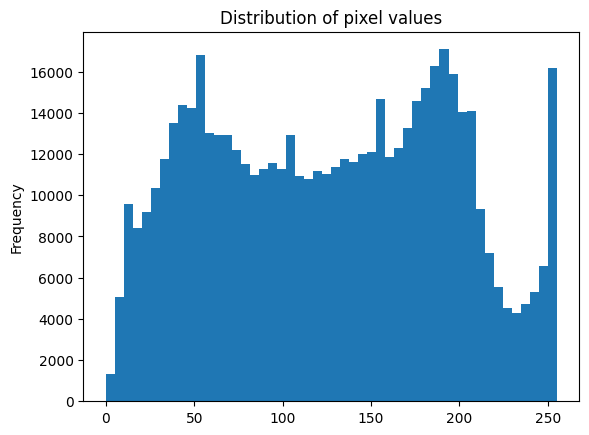

In [21]:
# make a histogram of the flattened (all in one array) images from a series
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=50, title="Distribution of pixel values")
plt.show()

#### Display Images

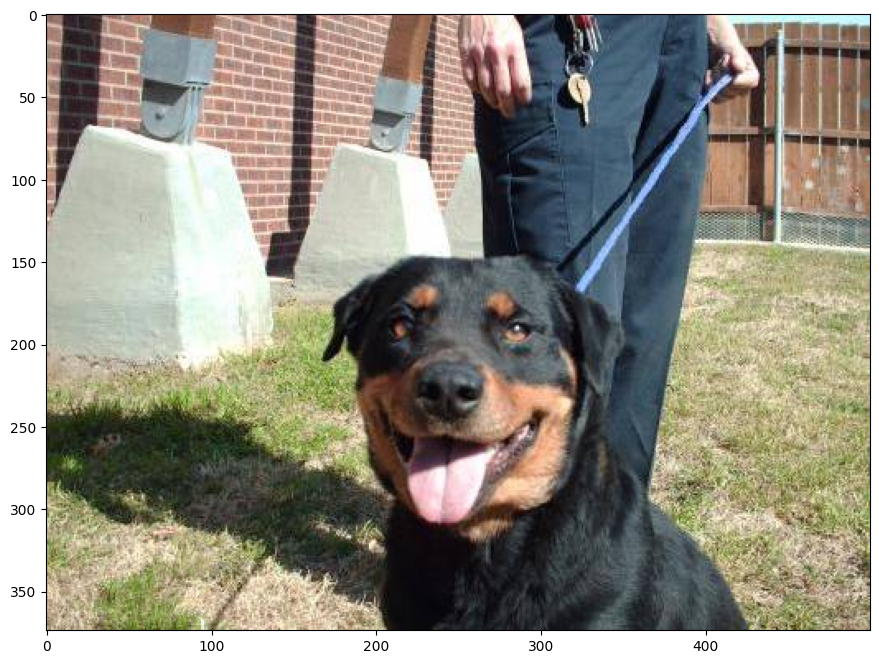

In [22]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.imshow(img_mpl) # using the matplot lib .imshow() passing the image
plt.show()

#### Image Channels


RGB channels - sort of like stacked numpy arrays - all blue, all red, all green

In [23]:
print(img_mpl.shape, "values are HEIGHT, WIDITH, and the three channels (RGB)")

(374, 500, 3) values are HEIGHT, WIDITH, and the three channels (RGB)


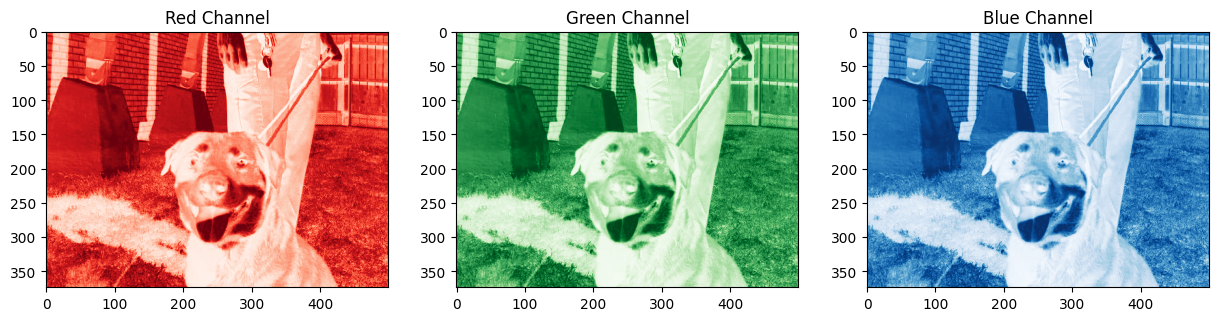

In [24]:
# display RGB channels of image
fig, axs = plt.subplots(1,3, figsize= (15,6))
axs[0].imshow(img_mpl[:,:,0], cmap="Reds")
axs[1].imshow(img_mpl[:,:,0], cmap="Greens")
axs[2].imshow(img_mpl[:,:,0], cmap="Blues")
axs[0].set_title("Red Channel")
axs[1].set_title("Green Channel")
axs[2].set_title("Blue Channel")
plt.show()

### Matplotlib vs cv2 Numpy Arrays



*   cv2 reads in channels as BGR
*   matplotlib reads in channels as RGB


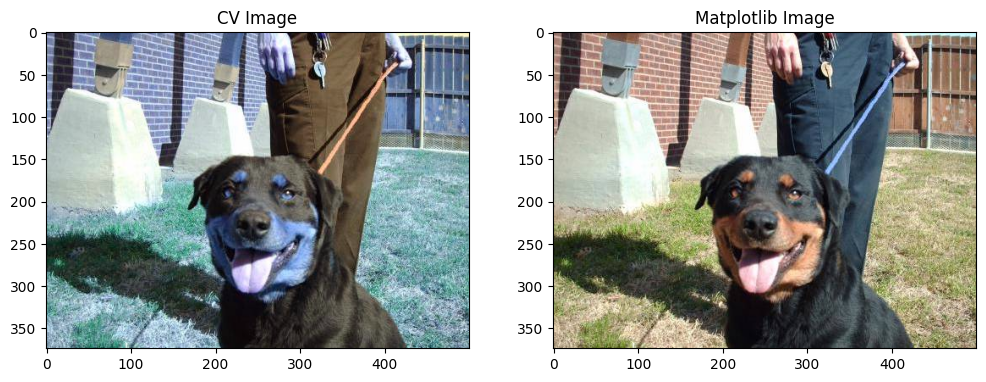

In [25]:
fig, axs = plt.subplots(1,2, figsize= (12,6))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].set_title("CV Image")
axs[1].set_title("Matplotlib Image")
plt.show()

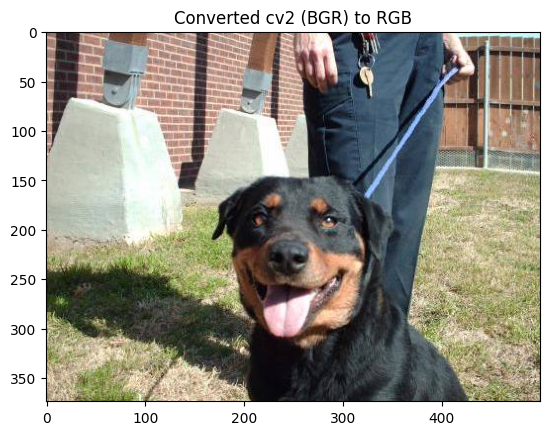

In [26]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.set_title("Converted cv2 (BGR) to RGB")
plt.show()

#### Image Manipulation

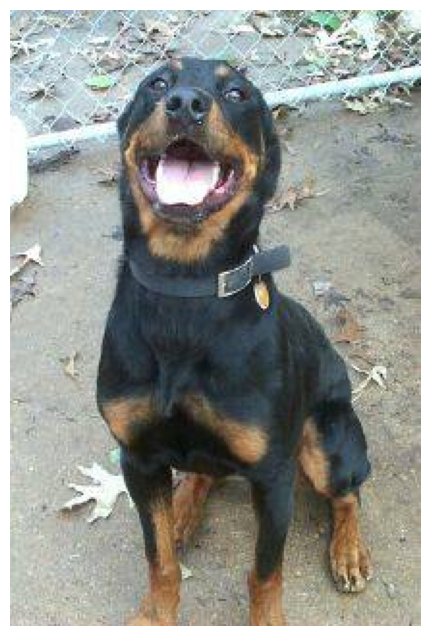

In [34]:
img = plt.imread(dog_files[40])
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(img)
ax.axis("off")
plt.show()

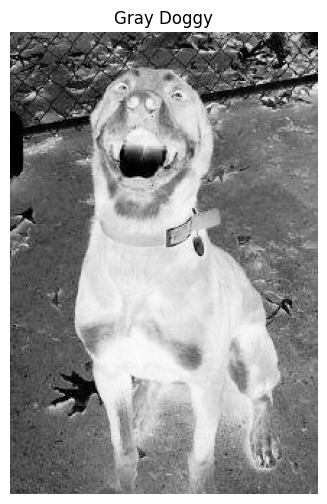

In [35]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(9,6))
ax.imshow(img_gray, cmap="Greys")
ax.axis("off")
ax.set_title("Gray Doggy")
plt.show()

### Resizing and Scaling

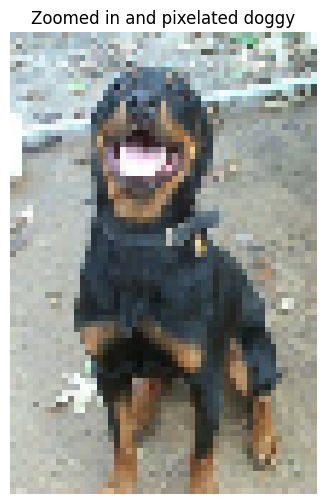

In [37]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize = (9,6))
ax.imshow(img_resized)
ax.axis("off")
ax.set_title("Zoomed in and pixelated doggy")
plt.show()

In [40]:
# COMPARE THE SHAPE OF THE THREE IMAGES
print(img.shape, "notice the normal 3 channels")
print("--------------")
print(img_gray.shape, "notice there's no RGB b/c its gray")
print("--------------")
print(img_resized.shape, "1/4 scale")

(320, 213, 3) notice the normal 3 channels
--------------
(320, 213) notice there's no RGB b/c its gray
--------------
(80, 53, 3) 1/4 scale


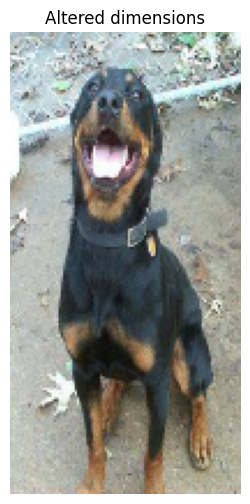

In [43]:
# Can stretch out dimensions
img_resize = cv2.resize(img, (100,200)) # set dimensions
fig, ax = plt.subplots(figsize = (9,6))
ax.imshow(img_resize)
ax.axis("off")
ax.set_title("Altered dimensions")
plt.show()

#### Upsizing w/ cv2.resize

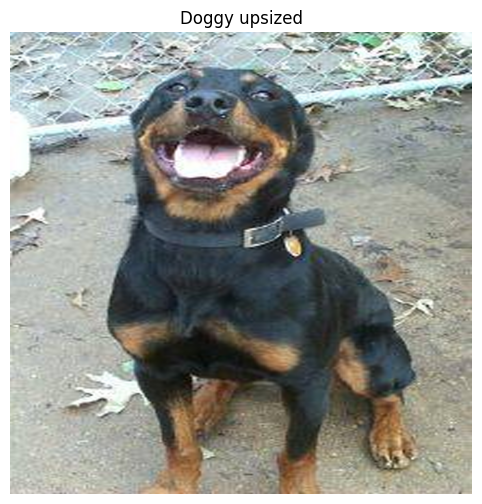

In [45]:
img_upsized = cv2.resize(img, (5000,5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize = (9,6))
ax.imshow(img_upsized)
ax.axis("off")
ax.set_title("Doggy upsized")
plt.show()

In [49]:
# compare image shape
print("image channels of original: ", img.shape)
print("---------")
print("image channels of upsized: ", img_upsized.shape)

image channels of original:  (320, 213, 3)
---------
image channels of upsized:  (5000, 5000, 3)


#### Sharpening w/ kernels

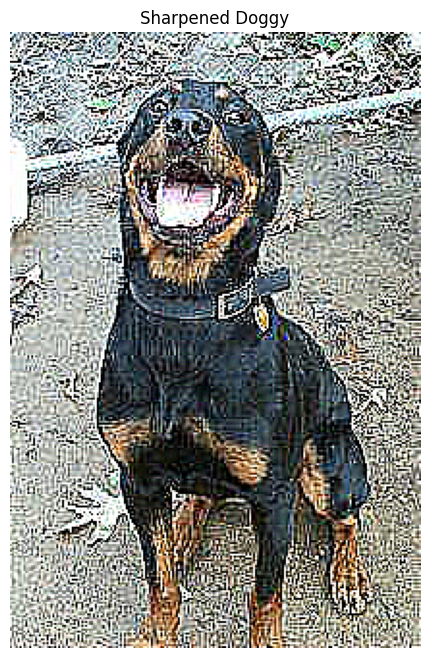

In [51]:
# sharpen image w/ array

kernel_sharpening = np.array([[-1, -1, -1,],
                              [-1, 9, -1],
                              [-1, -1, -1]])

sharpened_img = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(sharpened_img)
ax.axis("off")
ax.set_title("Sharpened Doggy")
plt.show()

#### Bluring Image

In [52]:
# blurring array
kernel_3x3 = np.ones((3,3), np.float32) / 9
kernel_3x3

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

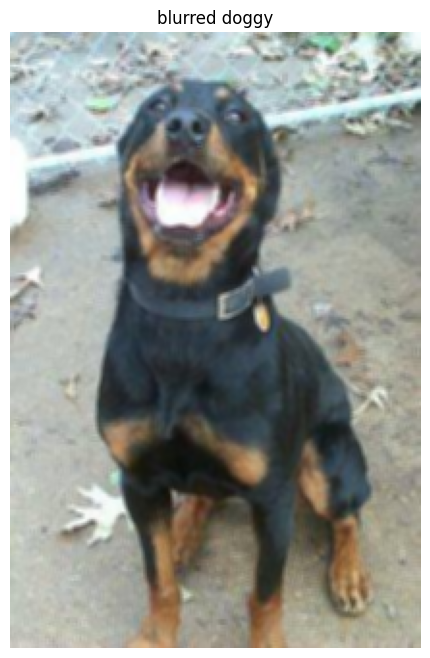

In [53]:
# Blurring the image
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(blurred)
ax.axis("off")
ax.set_title("blurred doggy")
plt.show()

#### SAVING THE IMAGE

In [55]:
# with matplotlib
plt.imsave("mpl_dog.png", blurred)
# no output

In [56]:
# with cv2

cv2.imwrite("cv2_dog.png", img_gray)
# outputs TRUE if saved

True

#### saving to g drive

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
!cp 'cv2_dog.png' '/content/drive/MyDrive/Colab Notebooks/Image_classification/Cats_and_dogs/export_testing/'

In [61]:
!cp 'mpl_dog.png' '/content/drive/MyDrive/Colab Notebooks/Image_classification/Cats_and_dogs/export_testing/'